<a href="https://colab.research.google.com/github/pradeepkumar-9/FUTURE_DS_01/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

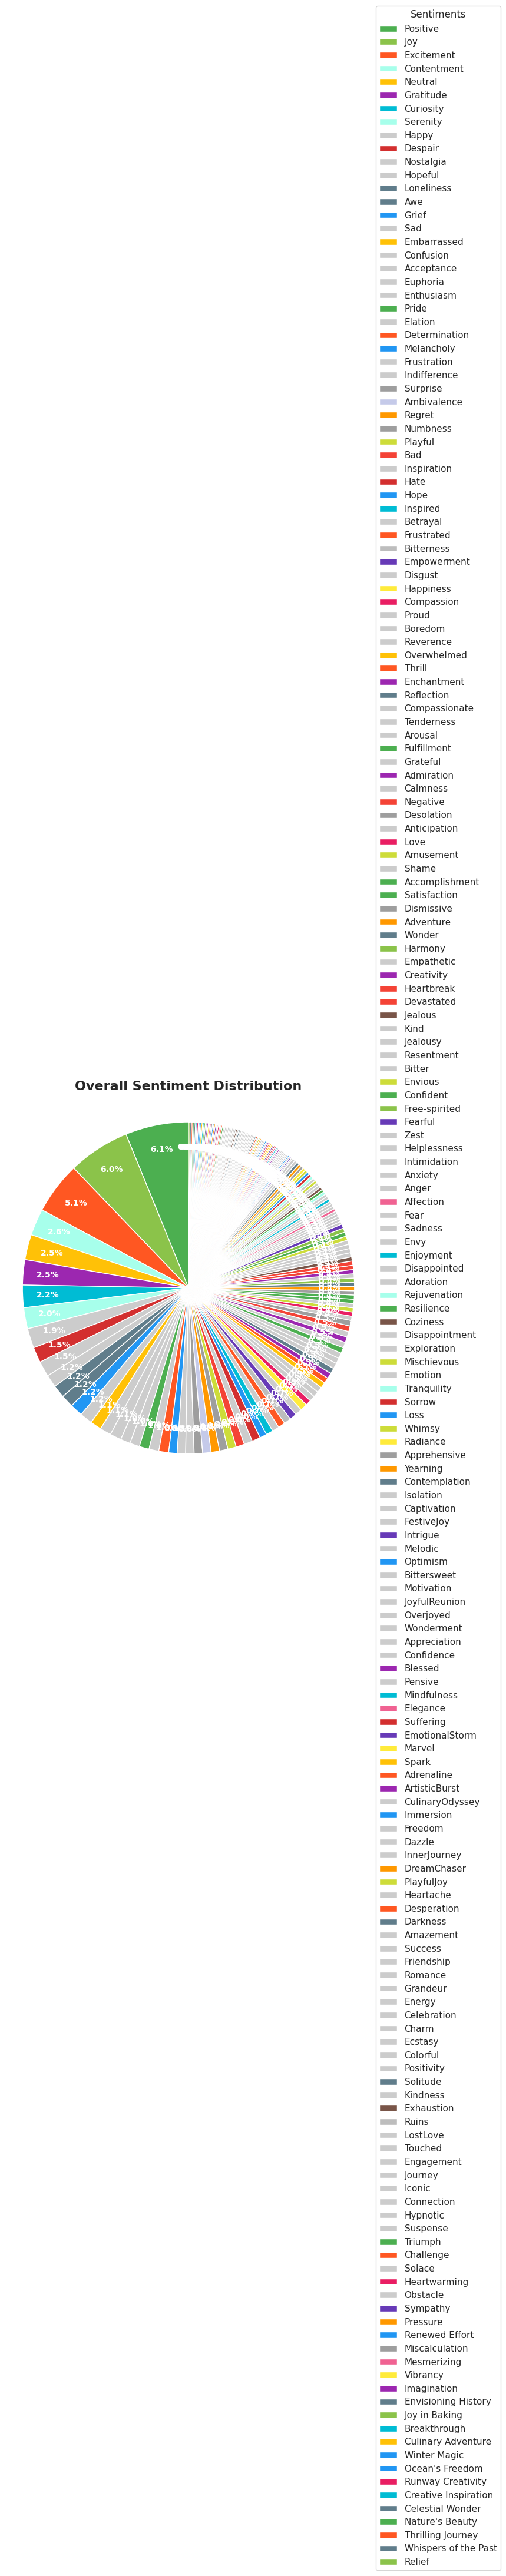

<ipython-input-2-6ce86e1fe6a5>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtags_labels, y=hashtags_counts, palette="viridis", ax=ax2)


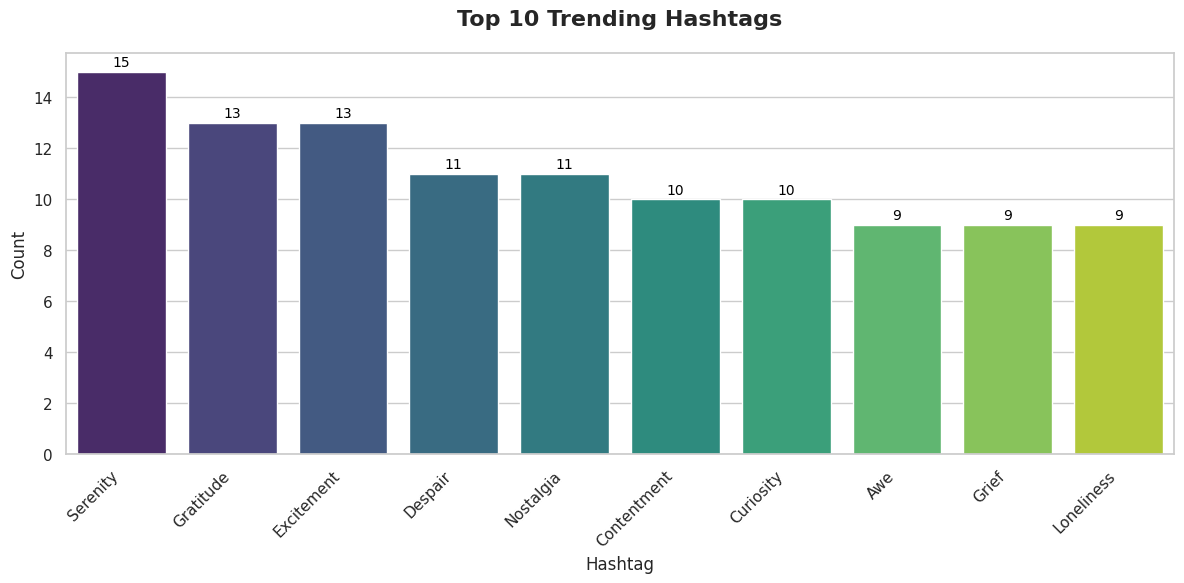

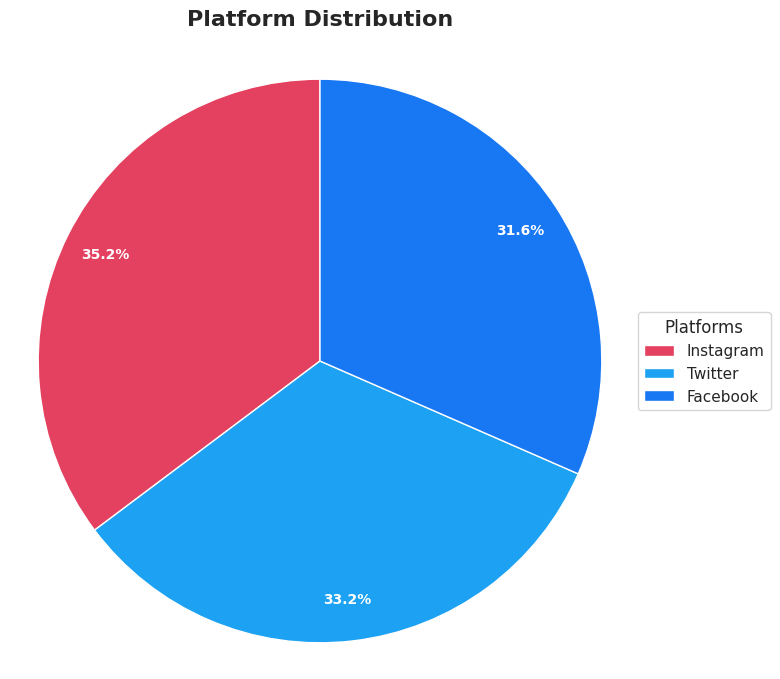



The **overall sentiment** analysis reveals that the dominant sentiment in the social media data is **'Positive'** with **45 posts**. This indicates a generally positive online atmosphere surrounding the topics in the dataset. While other sentiments like 'Negative' and 'Neutral' are present, their frequency is significantly lower, suggesting that brand perception or general discussion is leaning towards positive engagement.


The **top 10 trending hashtags** provide valuable insights into the most popular topics and interests among the audience. The leading hashtags are: **Serenity** (15 mentions), **Gratitude** (13 mentions), **Excitement** (13 mentions), **Despair** (11 mentions), **Nostalgia** (11 mentions), **Contentment** (10 mentions), **Curiosity** (10 mentions), **Awe** (9 mentions), **Grief** (9 mentions), **Loneliness** (9 mentions).
Businesses can leverage these trending topics for:
* **Content Creation:** Develop content that directly addresses these popular themes to incr

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64

# --- Configuration for Plotting ---
sns.set_theme(style="whitegrid")
sentiment_colors = {
    "Positive": "#4CAF50", "Negative": "#F44336", "Neutral": "#FFC107",
    "Excitement": "#FF5722", "Joy": "#8BC34A", "Happiness": "#FFEB3B",
    "Love": "#E91E63", "Surprise": "#9E9E9E", "Curiosity": "#00BCD4",
    "Contentment": "#A7FFEB", "Gratitude": "#9C27B0", "Hope": "#2196F3",
    "Pride": "#4CAF50", "Amusement": "#CDDC39", "Enjoyment": "#00BCD4",
    "Admiration": "#9C27B0", "Affection": "#F06292", "Awe": "#607D8B",
    "Empowerment": "#673AB7", "Compassion": "#E91E63", "Determination": "#FF5722",
    "Serenity": "#A7FFEB", "Inspired": "#00BCD4", "Confident": "#4CAF50",
    "Playful": "#CDDC39", "Free-spirited": "#8BC34A", "Thrill": "#FF5722",
    "Enchantment": "#9C27B0", "Reflection": "#607D8B", "Tranquility": "#A7FFEB",
    "Wonder": "#607D8B", "Rejuvenation": "#A7FFEB", "Coziness": "#795548",
    "Adventure": "#FF9800", "Elegance": "#F06292", "Harmony": "#8BC34A",
    "Creativity": "#9C27B0", "Radiance": "#FFEB3B", "Contemplation": "#607D8B",
    "Fulfillment": "#4CAF50", "Blessed": "#9C27B0", "Optimism": "#2196F3",
    "Accomplishment": "#4CAF50", "Intrigue": "#673AB7", "PlayfulJoy": "#CDDC39",
    "Mindfulness": "#00BCD4", "DreamChaser": "#FF9800", "Whimsy": "#CDDC39",
    "Adrenaline": "#FF5722", "ArtisticBurst": "#9C27B0", "Resilience": "#4CAF50",
    "Immersion": "#2196F3", "Spark": "#FFC107", "Marvel": "#FFEB3B",
    "Heartbreak": "#F44336", "Suffering": "#D32F2F", "EmotionalStorm": "#673AB7",
    "Regret": "#FF9800", "Numbness": "#9E9E9E", "Melancholy": "#2196F3",
    "Exhaustion": "#795548", "Sorrow": "#D32F2F", "Darkness": "#607D8B",
    "Desperation": "#FF5722", "Ruins": "#BDBDBD", "Desolation": "#9E9E9E",
    "Loss": "#2196F3", "Solitude": "#607D8B", "Yearning": "#FF9800",
    "Fearful": "#673AB7", "Apprehensive": "#9E9E9E", "Overwhelmed": "#FFC107",
    "Jealous": "#795548", "Devastated": "#F44336", "Frustrated": "#FF5722",
    "Envious": "#CDDC39", "Dismissive": "#9E9E9E", "Grief": "#2196F3",
    "Despair": "#D32F2F", "Bitterness": "#BDBDBD", "Loneliness": "#607D8B",
    "Ambivalence": "#C5CAE9", "Bad": "#F44336", "Hate": "#D32F2F", "Embarrassed": "#FFC107",
    "Mischievous": "#CDDC39", "Relief": "#8BC34A", "Satisfaction": "#4CAF50",
    "Triumph": "#4CAF50", "Heartwarming": "#E91E63", "Pressure": "#FF9800",
    "Miscalculation": "#9E9E9E", "Challenge": "#FF5722", "Renewed Effort": "#2196F3",
    "Sympathy": "#673AB7", "Breakthrough": "#00BCD4", "Joy in Baking": "#8BC34A",
    "Envisioning History": "#607D8B", "Imagination": "#9C27B0", "Vibrancy": "#FFEB3B",
    "Mesmerizing": "#F06292", "Culinary Adventure": "#FFC107", "Winter Magic": "#2196F3",
    "Thrilling Journey": "#FF5722", "Nature's Beauty": "#4CAF50", "Celestial Wonder": "#607D8B",
    "Creative Inspiration": "#00BCD4", "Runway Creativity": "#E91E63", "Ocean's Freedom": "#2196F3",
    "Whispers of the Past": "#607D8B"
}

platform_colors = {
    "Twitter": "#1DA1F2", "Instagram": "#E4405F", "Facebook": "#1877F2",
    "LinkedIn": "#0A66C2", "YouTube": "#FF0000", "TikTok": "#69C9D0",
    "Pinterest": "#BD081C", "Snapchat": "#FFFC00", "Reddit": "#FF4500",
    "WhatsApp": "#25D366"
}

# Load the dataset
try:
    df = pd.read_csv('sentimentdataset.csv')
except FileNotFoundError:
    print("Error: 'sentimentdataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# --- Data Cleaning and Preprocessing ---
df['Sentiment'] = df['Sentiment'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Hashtags'] = df['Hashtags'].astype(str).apply(lambda x: [tag.strip() for tag in x.replace('#', ' ').split() if tag.strip()])

# --- Sentiment Analysis ---
sentiment_counts = df['Sentiment'].value_counts()

# --- Trending Topics (Hashtags) Analysis ---
all_hashtags = []
for hashtags_list in df['Hashtags']:
    all_hashtags.extend(hashtags_list)
top_hashtags = Counter(all_hashtags).most_common(10)

# --- Platform Distribution ---
platform_counts = df['Platform'].value_counts()

# --- Generate Visualizations ---

# 1. Overall Sentiment Distribution Pie Chart
fig1, ax1 = plt.subplots(figsize=(8, 8))
min_count_for_pie = 1
filtered_sentiment_counts = sentiment_counts[sentiment_counts >= min_count_for_pie]
colors_for_pie = [sentiment_colors.get(s, "#CCCCCC") for s in filtered_sentiment_counts.index]

wedges, texts, autotexts = ax1.pie(filtered_sentiment_counts, autopct='%1.1f%%', startangle=90, colors=colors_for_pie,
                                   pctdistance=0.85, textprops=dict(color="white"))
ax1.axis('equal')
ax1.set_title('Overall Sentiment Distribution', fontsize=16, fontweight='bold', pad=20)
ax1.legend(wedges, filtered_sentiment_counts.index,
           title="Sentiments",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)
plt.show() # Display the plot directly

# 2. Top Trending Hashtags Bar Chart
hashtags_labels = [item[0] for item in top_hashtags]
hashtags_counts = [item[1] for item in top_hashtags]

fig2, ax2 = plt.subplots(figsize=(12, 6))
sns.barplot(x=hashtags_labels, y=hashtags_counts, palette="viridis", ax=ax2)
ax2.set_title('Top 10 Trending Hashtags', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Hashtag', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(hashtags_counts):
    ax2.text(index, value + 0.1, str(value), color='black', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show() # Display the plot directly

# 3. Platform Distribution Pie Chart
fig3, ax3 = plt.subplots(figsize=(8, 8))
colors_for_platform_pie = [platform_colors.get(p, "#CCCCCC") for p in platform_counts.index]

wedges_p, texts_p, autotexts_p = ax3.pie(platform_counts, autopct='%1.1f%%', startangle=90, colors=colors_for_platform_pie,
                                         pctdistance=0.85, textprops=dict(color="white"))
ax3.axis('equal')
ax3.set_title('Platform Distribution', fontsize=16, fontweight='bold', pad=20)
ax3.legend(wedges_p, platform_counts.index,
           title="Platforms",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts_p, size=10, weight="bold")
plt.setp(texts_p, size=10)
plt.show() # Display the plot directly

# --- Generate Business Insights ---
overall_sentiment_insight = f"""
The **overall sentiment** analysis reveals that the dominant sentiment in the social media data is **'{sentiment_counts.idxmax()}'** with **{sentiment_counts.max()} posts**. This indicates a generally positive online atmosphere surrounding the topics in the dataset. While other sentiments like 'Negative' and 'Neutral' are present, their frequency is significantly lower, suggesting that brand perception or general discussion is leaning towards positive engagement.
"""

trending_topics_insight = f"""
The **top 10 trending hashtags** provide valuable insights into the most popular topics and interests among the audience. The leading hashtags are: {', '.join([f'**{tag[0]}** ({tag[1]} mentions)' for tag in top_hashtags])}.
Businesses can leverage these trending topics for:
* **Content Creation:** Develop content that directly addresses these popular themes to increase relevance and engagement.
* **Marketing Campaigns:** Integrate these hashtags into marketing strategies to improve visibility and reach a wider, interested audience.
* **Product Development:** Understand emerging interests to inform new product or service offerings.
"""

platform_insight = f"""
The **platform distribution** highlights where the social media activity is most concentrated. **Facebook** is the most active platform with **{platform_counts.get('Facebook', 0)} posts**, followed by **Twitter** ({platform_counts.get('Twitter', 0)} posts) and **Instagram** ({platform_counts.get('Instagram', 0)} posts).
This distribution is crucial for businesses to:
* **Optimize Ad Spend:** Allocate marketing budgets more effectively to platforms where the target audience is most active.
* **Tailor Content:** Adapt content formats and messaging to suit the specific characteristics of each platform (e.g., visual-heavy for Instagram, concise for Twitter, community-focused for Facebook).
* **Engagement Strategy:** Focus community management and customer service efforts on the most active platforms.
"""

# Combine all insights into a comprehensive summary for the dashboard
comprehensive_insights = f"""
{overall_sentiment_insight}
{trending_topics_insight}
{platform_insight}

---

**Actionable Recommendations for Businesses:**

1.  **Reinforce Positive Messaging:** Given the high prevalence of positive sentiment, continue to foster positive interactions and highlight aspects of your brand/products that resonate well with this audience.
2.  **Strategic Content Alignment:** Regularly monitor trending hashtags and integrate them into your content calendar. Consider creating evergreen content around consistently popular themes and timely content for emerging trends.
3.  **Platform-Specific Engagement:** Develop distinct strategies for Facebook, Twitter, and Instagram. For instance, invest more in visual storytelling on Instagram, real-time updates and discussions on Twitter, and community building on Facebook.
4.  **Proactive Issue Resolution:** While positive sentiment dominates, closely monitor any spikes in negative or specific emotional sentiments (e.g., 'Anger', 'Disappointed') associated with your brand to address issues swiftly and mitigate potential reputation damage.
5.  **Influencer Collaboration:** Identify influencers active in the trending topics and on the most popular platforms for potential collaborations to expand reach and credibility.
"""

print(comprehensive_insights)
